In [48]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Activation,Dropout,Flatten,Dense
from keras.optimizers import adam_v2
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import matplotlib.pyplot as plt

In [49]:
#定义模型
model = Sequential()
model.add(Conv2D(input_shape=(150,150,3),filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Flatten())  #将二维数据变成一维向量
#加上全连接层
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

#定义优化器
adam = adam_v2.Adam(lr=1e-4)

#定义优化器，代价函数，训练过程中计算准确率
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])


E:\Java-big-gift\anaconda\envs\tensorflow\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [50]:
#数据增强
train_datagen = ImageDataGenerator(
    rotation_range = 40,       #随机旋转度数
    width_shift_range = 0.2,   #随机水平位移
    height_shift_range = 0.2,  #随机竖直平移
    rescale = 1/255,           #数据归一化
    shear_range = 0.2,         #随机裁剪
    zoom_range = 0.2,          #随机放大
    horizontal_flip = True,    #水平翻转
    fill_mode = 'nearest',     #填充方式
)

test_datagen = ImageDataGenerator(
    rescale = 1/255,           #数据归一化

)

In [51]:
batch_size = 32  #每次训练会使用32张图片

#读取图像，将所有图像大小调整为150*150
#生成训练数据
train_generator = train_datagen.flow_from_directory(
    'myData/train1',
    target_size=(150,150),
    batch_size=batch_size,
)

#生成测试数据
test_generator = test_datagen.flow_from_directory(
    'myData/test1',
    target_size=(150,150),
    batch_size=batch_size,
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [52]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [53]:
history = model.fit_generator(train_generator,epochs=25,validation_data=test_generator)

E:\Java-big-gift\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/25
63/63 [==============================] - 243s 4s/step - loss: 0.6928 - accuracy: 0.5110 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/25
63/63 [==============================] - 224s 4s/step - loss: 0.6901 - accuracy: 0.5360 - val_loss: 0.6862 - val_accuracy: 0.6060
Epoch 3/25
63/63 [==============================] - 223s 4s/step - loss: 0.6854 - accuracy: 0.5500 - val_loss: 0.6658 - val_accuracy: 0.5870
Epoch 4/25
63/63 [==============================] - 224s 4s/step - loss: 0.6677 - accuracy: 0.5820 - val_loss: 0.6415 - val_accuracy: 0.6450
Epoch 5/25
63/63 [==============================] - 227s 4s/step - loss: 0.6580 - accuracy: 0.5945 - val_loss: 0.6242 - val_accuracy: 0.6470
Epoch 6/25
63/63 [==============================] - 222s 4s/step - loss: 0.6426 - accuracy: 0.6215 - val_loss: 0.6149 - val_accuracy: 0.6520
Epoch 7/25
63/63 [==============================] - 229s 4s/step - loss: 0.6485 - accuracy: 0.6290 - val_loss: 0.6374 - val_accuracy: 0.6440
Epoch 8/25
63

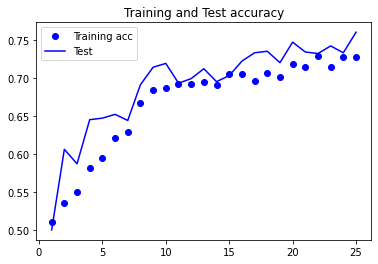

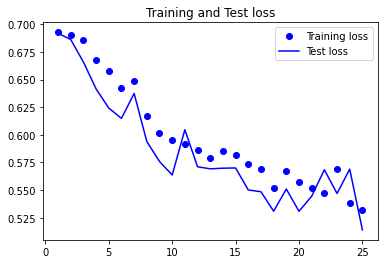

In [69]:
# #保存模型
# model.save('model_cnn.h5')
import matplotlib.pyplot as plt
#绘制损失函数和模型准确度
#分别返回测试精度，验证精度，训练损失，验证损失
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)#迭代次数

#绘制训练精度和验证精度的图,bo表示蓝色圆点表示，b为蓝色曲线
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Test')
plt.title('Training and Test accuracy')
plt.legend()

plt.figure()

#绘制训练损失和验证损失
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Test loss')
plt.title('Training and Test loss')
plt.legend()
plt.show()



# 测试

In [2]:
from keras.models import load_model
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix,precision_score, recall_score,accuracy_score
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

test_datagen = ImageDataGenerator(
    rescale = 1/255,           #数据归一化
)

#生成测试数据
test_generator = test_datagen.flow_from_directory(
    'myData/test1',
    target_size=(150,150),
    batch_size=32,
    shuffle=False,
)


label = np.array(['cat','dog'])

#载入模型
model = load_model('model_cnn.h5')

y_pred = model.predict(test_generator)
y_pred = tf.argmax(y_pred,1)
y_test = test_generator.classes
# print(y_pred)
# print(y_test)
print('混淆矩阵: \n' , confusion_matrix(y_test,y_pred))
print('精确率: ' , precision_score(y_test,y_pred,average='macro'))
print('准确率: ' , accuracy_score(y_test,y_pred))
print('召回率: ' , recall_score(y_test,y_pred,average='macro'))



Found 1000 images belonging to 2 classes.
混淆矩阵: 
 [[390 110]
 [136 364]]
精确率:  0.7546886781858144
准确率:  0.754
召回率:  0.754
